<a href="https://colab.research.google.com/github/mariyajoseph2002/ml/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mood_depression_dataset1.csv to mood_depression_dataset1.csv


In [3]:
df = pd.read_csv('mood_depression_dataset1.csv')

# Display the first few rows
print(df.head())

   mood  social_interaction  work_productivity  hobbies_selfcare  \
0     1                   0                  0                 0   
1     3                   1                  0                 1   
2     2                   2                  0                 0   
3     1                   0                  1                 0   
4     0                   2                  1                 0   

   emotional_triggers  mood_trend  depression_risk  
0                   2    0.092371                0  
1                   0    0.060754                0  
2                   0    0.604192                2  
3                   1    0.966116                1  
4                   0    0.502721                0  


In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check column names and data types
print(df.info())

Shape of the dataset: (5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mood                5000 non-null   int64  
 1   social_interaction  5000 non-null   int64  
 2   work_productivity   5000 non-null   int64  
 3   hobbies_selfcare    5000 non-null   int64  
 4   emotional_triggers  5000 non-null   int64  
 5   mood_trend          5000 non-null   float64
 6   depression_risk     5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB
None


In [5]:
# Check for missing values
print(df.isnull().sum())

mood                  0
social_interaction    0
work_productivity     0
hobbies_selfcare      0
emotional_triggers    0
mood_trend            0
depression_risk       0
dtype: int64


depression_risk
0    2608
1    1427
2     796
3     169
Name: count, dtype: int64


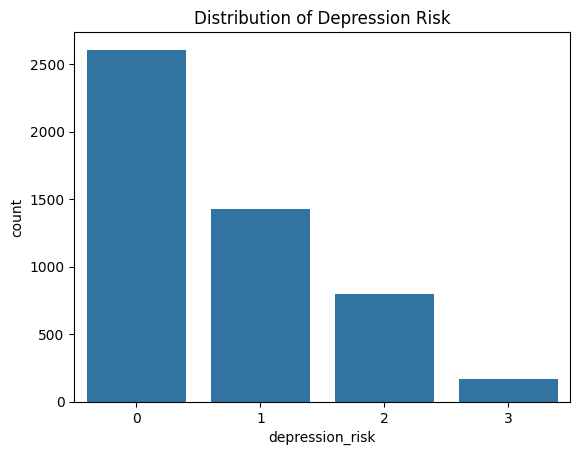

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(df['depression_risk'].value_counts())

# Visualize the distribution
sns.countplot(x='depression_risk', data=df)
plt.title('Distribution of Depression Risk')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset
X = df.drop('depression_risk', axis=1)
y = df['depression_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 6)
Testing set shape: (1000, 6)


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

depression_risk
2    2081
0    2081
3    2081
1    2081
Name: count, dtype: int64


In [10]:
# Check for missing values after SMOTE
print(pd.DataFrame(X_resampled).isnull().sum())

mood                  0
social_interaction    0
work_productivity     0
hobbies_selfcare      0
emotional_triggers    0
mood_trend            0
dtype: int64


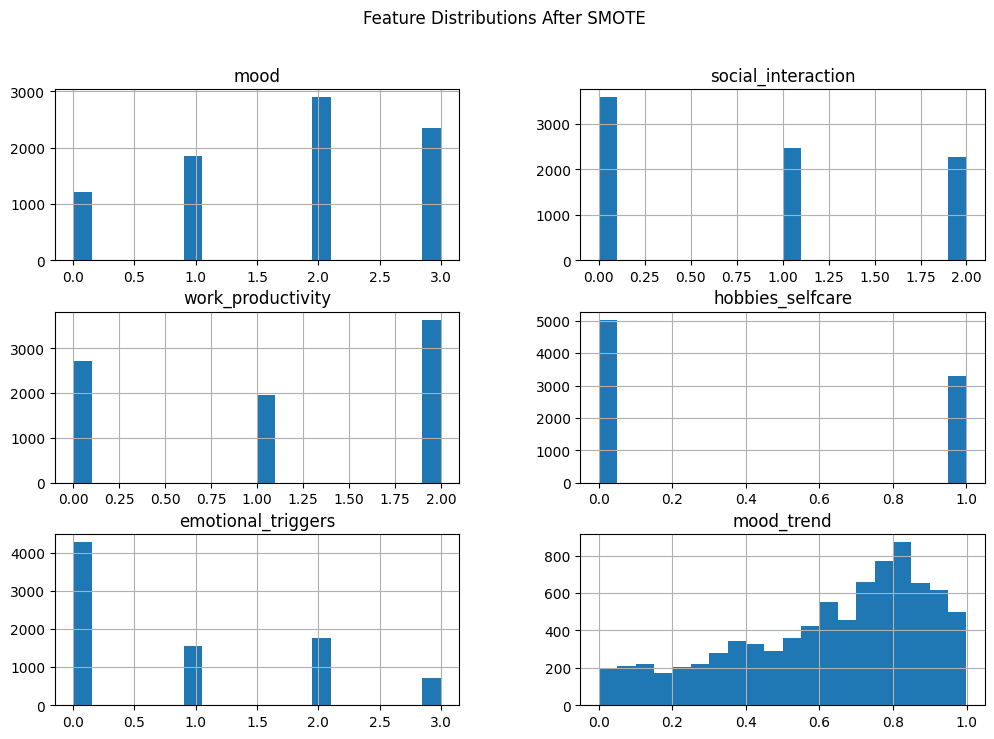

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions After SMOTE')
plt.show()

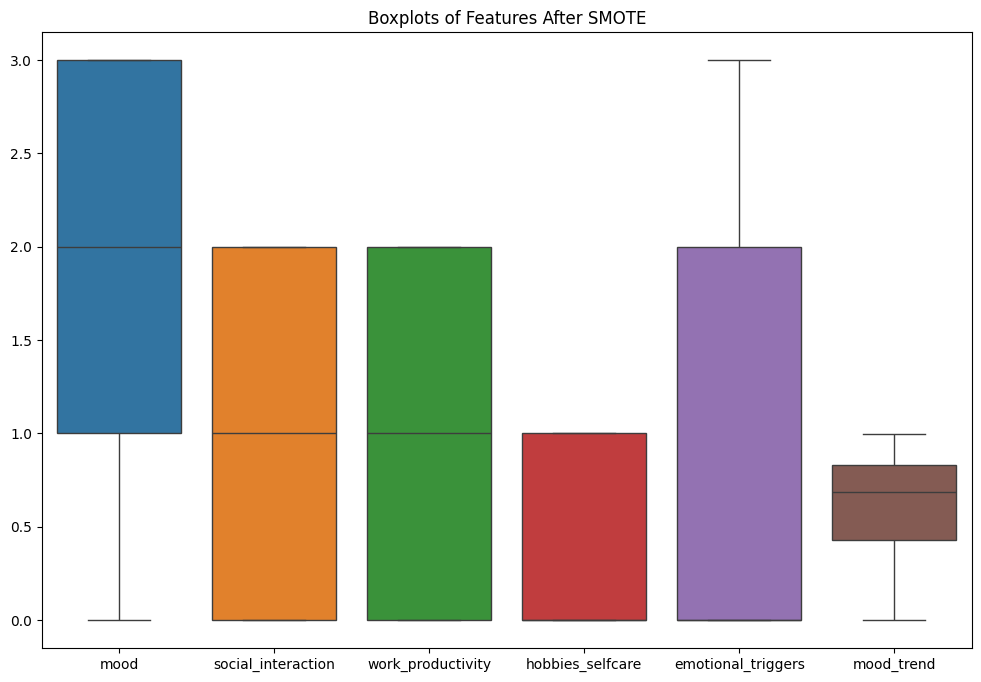

In [14]:
# Plot boxplots for all features
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_resampled_df)
plt.title('Boxplots of Features After SMOTE')
plt.show()

In [15]:
# Calculate skewness for each feature
skewness = X_resampled_df.skew()
print("Skewness of Features:\n", skewness)

# Apply log transformation to highly skewed features (if needed)
import numpy as np

for feature in X_resampled_df.columns:
    if abs(skewness[feature]) > 1:  # Adjust threshold as needed
        X_resampled_df[feature] = np.log1p(X_resampled_df[feature])  # log(1 + x) to handle zeros

Skewness of Features:
 mood                 -0.352098
social_interaction    0.297223
work_productivity    -0.212155
hobbies_selfcare      0.426562
emotional_triggers    0.738493
mood_trend           -0.658974
dtype: float64


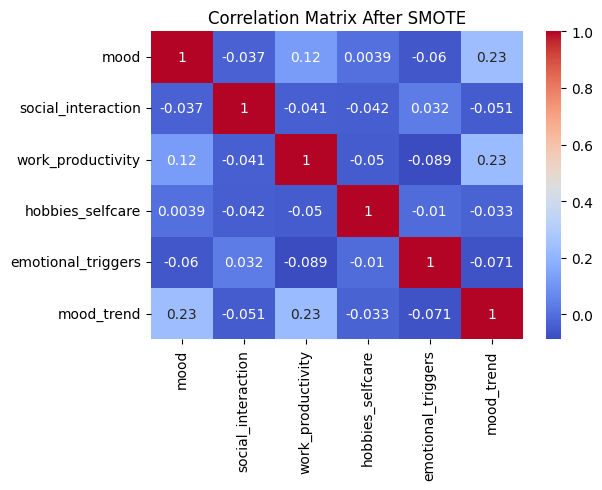

In [18]:
# Compute correlation matrix
corr_matrix = X_resampled_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After SMOTE')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, f1_score

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       290
           2       1.00      1.00      1.00       145
           3       1.00      1.00      1.00        38

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Weighted F1-score: 1.0


In [21]:
# Check for duplicates between training and test sets
train_test_duplicates = pd.merge(X_train, X_test, how='inner')
print("Number of duplicates between train and test sets:", len(train_test_duplicates))

Number of duplicates between train and test sets: 0


In [22]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model1, X_resampled, y_resampled, cv=5, scoring='f1_weighted')
print("Cross-Validation F1-scores:", cv_scores)
print("Mean CV F1-score:", cv_scores.mean())

Cross-Validation F1-scores: [1.        0.9993994 0.9993994 1.        1.       ]
Mean CV F1-score: 0.9997597594127037


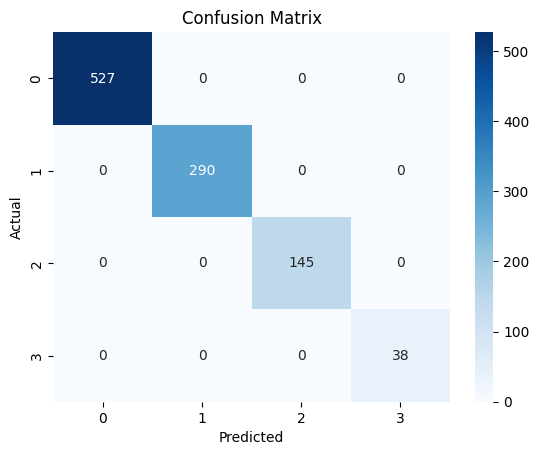

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

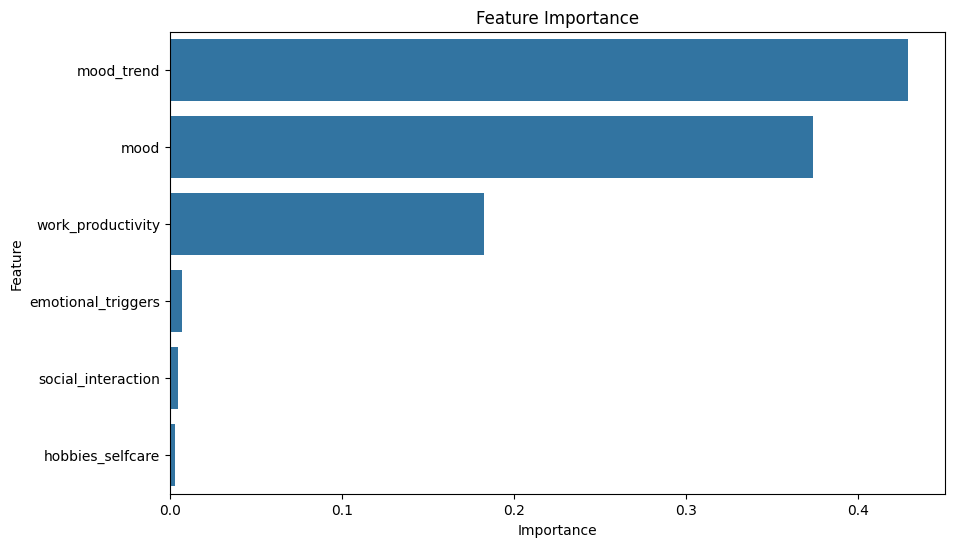

In [24]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a logistic regression model
model2 = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))  # Single layer with sigmoid activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2920 - loss: 0.5865 - val_accuracy: 0.2988 - val_loss: 0.6347
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2832 - loss: 0.5979 - val_accuracy: 0.3013 - val_loss: 0.5612
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2928 - loss: 0.4659 - val_accuracy: 0.3013 - val_loss: 0.4909
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3056 - loss: 0.3943 - val_accuracy: 0.3050 - val_loss: 0.4254
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3053 - loss: 0.3831 - val_accuracy: 0.3100 - val_loss: 0.3640
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3084 - loss: 0.3856 - val_accuracy: 0.3175 - val_loss: 0.3067
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3240 - loss: 0.2344 - val_accuracy: 0.3250 - val_loss: 0.2532
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3180 - loss: 0.2332 - val_accuracy: 0

In [39]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4564 - loss: -0.1832
Test Accuracy: 0.4560


In [29]:
from sklearn.metrics import classification_report, f1_score

# Predict on the test set
y_pred_prob = model2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.31      0.48       527
           1       0.35      1.00      0.52       290
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00        38

    accuracy                           0.46      1000
   macro avg       0.34      0.33      0.25      1000
weighted avg       0.63      0.46      0.40      1000

Weighted F1-score: 0.40211743258718347


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)


In [49]:

from tensorflow.keras.layers import  Input

# Define the model with an Input layer
model = Sequential([
    Input(shape=(X_resampled.shape[1],)),  # Explicit Input layer
    Dense(128, activation='relu'),  # First hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer
])


In [54]:
model = Sequential([
    Input(shape=(X_resampled_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3871 - loss: -0.1938 - val_accuracy: 0.5600 - val_loss: -11.4855
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5625 - loss: -45.6111 - val_accuracy: 0.5925 - val_loss: -337.6922
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5717 - loss: -639.8050 - val_accuracy: 0.6237 - val_loss: -2556.6560
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5966 - loss: -3580.6938 - val_accuracy: 0.5962 - val_loss: -9957.3516
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5891 - loss: -12828.5137 - val_accuracy: 0.6212 - val_loss: -29266.5820
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6082 - loss: -35205.6445 - val_accuracy: 0.6025 - val_loss: -66345.2422
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5892 - loss: -73573.0938 - val_accuracy: 0.5875 - val_loss: -127803.1406
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6149 - loss: -7814233.0000
Test Accuracy: 0.6080


In [58]:

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       527
           1       0.43      1.00      0.60       290
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00        38

    accuracy                           0.61      1000
   macro avg       0.36      0.40      0.34      1000
weighted avg       0.65      0.61      0.57      1000

Weighted F1-score: 0.5696985219275819


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.5 MB/s eta 0:00:00


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_resampled_scaled.shape[1],)))  # Input layer

    # Tune the number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),  # Tune number of neurons
            activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])  # Tune activation function
        ))
        model.add(Dropout(
            rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)  # Tune dropout rate
        ))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

<ipython-input-61-e1c5a1406b57>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [62]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial (for robustness)
    directory='my_tuning_dir',  # Directory to save tuning results
    project_name='my_nn_tuning'  # Project name
)

In [63]:
tuner.search(
    X_resampled_scaled, y_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Trial 10 Complete [00h 00m 49s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 10m 30s
